In [1]:
!pip install yfinance
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 3.3 MB/s eta 0:00:00


In [2]:
import yfinance as yf
import mplfinance as mpf
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import io
import base64


In [3]:
def get_stonks(sc,days):
  end_date = pd.Timestamp.now()
  start_date = end_date - pd.Timedelta(days=days)
  return yf.download(sc, start=start_date, end=end_date)


In [4]:
def make_atr(data,days,sc):
  #df2 = pd.DataFrame()
  ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
  #ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
  data['mean_price'] = data[["High","Low"]].mean(axis = 1)
  ax1.set_title(sc +' Price')
  ax1.plot(data['mean_price'].iloc[-1:-days-1:-1])
  high_low = data['High'] - data['Low']
  high_close = np.abs(data['High'] - data['Close'].shift())
  low_close = np.abs(data['Low'] - data['Close'].shift())
  ranges = pd.concat([high_low, high_close, low_close,], axis=1)
  true_range = np.max(ranges, axis=1)
  atr = true_range.rolling(14).sum()/14
  fig, ax = plt.subplots()
  ax.set_title('ATR')
  atr.plot(ax=ax)
  data['Close'].plot(ax = ax,secondary_y=True, alpha=0.3)
  plt.show()

  plt.savefig('graph.png')

  # buffer = io.BytesIO()
  # fig.savefig(buffer, format='png', bbox_inches='tight')
  # chart = base64.b64encode(buffer.getvalue()).decode('utf-8')

Enter Stock CodeAAPL
Enter days30
[*********************100%***********************]  1 of 1 completed


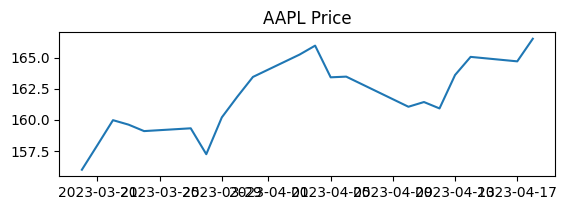

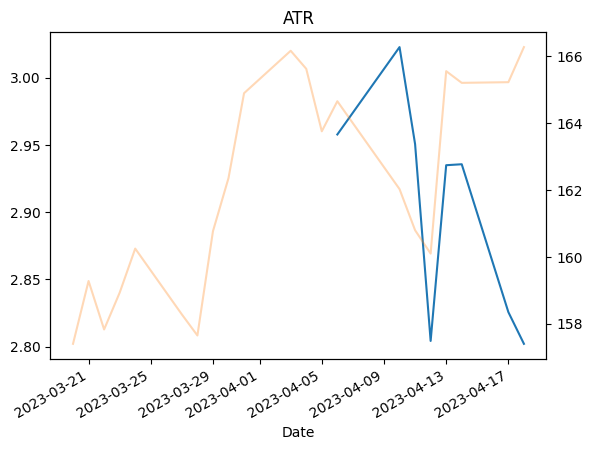

<Figure size 640x480 with 0 Axes>

In [5]:
sc = input("Enter Stock Code")
days = int(input("Enter days"))
df = get_stonks(sc,days)
make_atr(df,days,sc)

In [ ]:
#plt.savefig('my_plot.png', dpi=300, bbox_inches='tight')

# download the image file
#from google.colab import files
#files.download('my_plot.png')
df.head()

,Open,High,Low,Close,Adj Close,Volume,mean_price
Date,,,,,,,
2023-01-19,134.080002,136.250000,133.770004,135.270004,135.063782,58280400,135.010002
2023-01-20,135.279999,138.020004,134.220001,137.869995,137.659805,79972200,136.120003
2023-01-23,138.119995,143.320007,137.899994,141.110001,140.894882,81760300,140.610001
2023-01-24,140.309998,143.160004,140.300003,142.529999,142.312714,66435100,141.730003
2023-01-25,140.889999,142.429993,138.809998,141.860001,141.643738,65799300,140.619995
